In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import Lasso , Ridge , ElasticNet , LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score , confusion_matrix , classification_report
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay, permutation_importance
from scipy.stats import randint, zscore
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [6]:
print(test.shape)
print(train.shape)

(6175, 8)
(18524, 9)


In [7]:
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [8]:
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [9]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [11]:
train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [12]:
train.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [13]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [14]:
train['Stage_fear'] = train['Stage_fear'].map({'No': 0, 'Yes': 1})
train['Drained_after_socializing'] = train['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
train['Personality'] = train['Personality'].map({'Introvert': 0, 'Extrovert': 1})

train['Stage_fear'] = train['Stage_fear'].fillna(0)
train['Drained_after_socializing'] = train['Drained_after_socializing'].fillna(0)

numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                 'Friends_circle_size', 'Post_frequency']

for col in numerical_cols:
    train[col] = train[col].fillna(train[col].median())

In [15]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,2,6.0,1.0,1.0,0.0,0.0,3.0,0.0,0
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,4,1.0,0.0,4.0,4.0,0.0,13.0,5.0,1


**Feature Engineering**

In [16]:
def feature_engineering(df):
  df_new = df.copy()
  df_new['Stage_fear'] = df_new['Stage_fear'].map({'No': 0, 'Yes': 1}).fillna(-1)
  df_new['Drained_after_socializing'] = df_new['Drained_after_socializing'].map({'No': 0, 'Yes': 1}).fillna(-1)
  numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                 'Friends_circle_size', 'Post_frequency']
  for col in numerical_cols:
    df_new[col] = pd.to_numeric(df_new[col],errors='coerce').fillna(df_new[col].median())

  df_new['social_energy_ratio'] = df_new['Social_event_attendance'] / (df_new['Time_spent_Alone']+1)
  df_new['friend_social_ratio'] = df_new['Friends_circle_size'] / (df_new['Social_event_attendance']+1)
  df_new['post_social_ratio'] = df_new['Post_frequency'] / (df_new['Social_event_attendance']+1)
  df_new['social_activity_score']= (df_new['Social_event_attendance']+df_new['Going_outside']+df_new['Friends_circle_size']+df_new['Post_frequency'])/4
  df_new['introvert_score'] = (df_new['Time_spent_Alone']+df_new['Stage_fear']+df_new['Drained_after_socializing'])/3
  df_new['high_social'] = (df_new['Social_event_attendance'] > 5).astype(int)
  df_new['high_activity'] = (df_new['social_activity_score'] > 5).astype(int)
  df_new['low_friends'] = (df_new['Friends_circle_size'] < 5).astype(int)
  df_new['high_post'] = (df_new['Post_frequency'] > 5).astype(int)
  df_new['high_alone_time'] = (df_new['Time_spent_Alone'] > 5).astype(int)
  df_new['social_friend_product'] = df_new['Social_event_attendance'] * df_new['Friends_circle_size']
  df_new['alone_post_ratio'] = df_new['Time_spent_Alone'] / (df_new['Post_frequency']+1)
  df_new['going_outside_ratio'] = df_new['Going_outside'] / (df_new['Time_spent_Alone']+1)
  df_new['social_efficiency'] = df_new['Friends_circle_size'] / (df_new['Time_spent_Alone']+1)
  df_new['activity_balance'] = df_new['Social_event_attendance'] / (df_new['Post_frequency']+1)
  df_new['energy_management'] = np.where(df_new['Drained_after_socializing'] == -1, 0, df_new['Going_outside'] / (df_new['Drained_after_socializing']+1))
  df_new['stage_fear_encoded'] = df_new['Stage_fear'].map({-1: 0, 0: 1, 1: 2})
  df_new['drained_encoded'] = df_new['Drained_after_socializing'].map({-1: 0, 0: 1, 1: 2})
  df_new = df_new.replace([np.inf, -np.inf], np.nan)
  for col in df_new.columns:
    if col not in ['id', 'Personality']:
      if df_new[col].dtype in ['float64', 'float32']:
        df_new[col] = df_new[col].fillna(df_new[col].median())
      else:
        df_new[col] = df_new[col].fillna(0)
  return df_new


In [62]:
X_train_final = feature_engineering(train)
X_test_final = feature_engineering(test)

X = X_train_final.drop(columns=['id', 'Personality'])
y = X_train_final['Personality']

feature_columns = X.columns.tolist()

import joblib
joblib.dump(feature_columns, "feature_columns.pkl")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_test_final = X_test_final[[col for col in X_test_final.columns if col != 'id']]
X_test_final = X_test_final[X.columns]
X_test_scaled = scaler.transform(X_test_final)

**Deep learning**

In [18]:
def create_nn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(input_dim,)),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.ELU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.25),

        layers.Dense(128, activation='swish', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')])
    return model

In [19]:
model_nn = create_nn_model(X_train_scaled.shape[1])
optimizer = keras.optimizers.Adam(learning_rate=0.001,clipnorm= 1)
model_nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [20]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
history = model_nn.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[lr_scheduler])

Epoch 1/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9242 - loss: 0.7690 - val_accuracy: 0.9624 - val_loss: 0.5114 - learning_rate: 0.0010
Epoch 2/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9705 - loss: 0.4474 - val_accuracy: 0.9619 - val_loss: 0.3587 - learning_rate: 0.0010
Epoch 3/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9642 - loss: 0.3310 - val_accuracy: 0.9626 - val_loss: 0.2710 - learning_rate: 0.0010
Epoch 4/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9643 - loss: 0.2624 - val_accuracy: 0.9631 - val_loss: 0.2278 - learning_rate: 0.0010
Epoch 5/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9668 - loss: 0.2101 - val_accuracy: 0.9626 - val_loss: 0.2028 - learning_rate: 0.0010
Epoch 6/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9670 - loss: 0.1904 - val_accuracy: 0.9624 - val_loss: 0.1956 - learning_rate: 0.0010
Epoch 7/200
406/406 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9672 - loss

In [21]:
print('\n Modle Evaluation')
y_pred_proba = model_nn.predict(X_val_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')


 Modle Evaluation
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9632961496941346


In [22]:
print('Classification Report:\n', classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1448
           1       0.97      0.98      0.98      4110

    accuracy                           0.96      5558
   macro avg       0.95      0.95      0.95      5558
weighted avg       0.96      0.96      0.96      5558



In [23]:
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))

Confusion Matrix:
 [[1336  112]
 [  92 4018]]


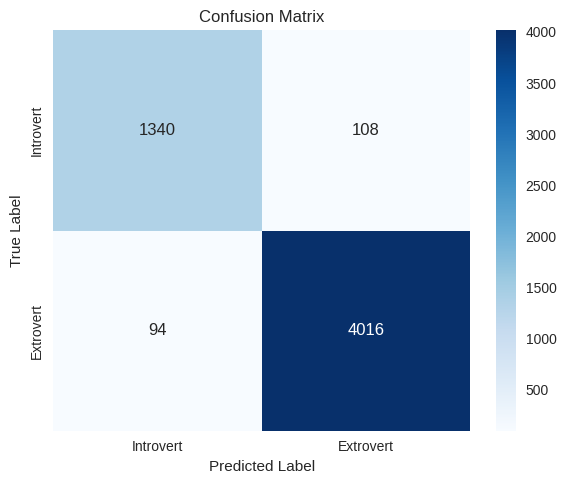

In [33]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [25]:
test_pred_proba = model_nn.predict(X_test_scaled)

test_prediction = (test_pred_proba > 0.5).astype(int).flatten()

submission = pd.DataFrame({
    'id': test['id'],
    'Personality': test_prediction
})
submission['Personality'] = submission['Personality'].map({0: 'Introvert', 1: 'Extrovert'})

submission.to_csv('submissionx.csv', index=False)
print("✅ Submission file created successfully!")


193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
✅ Submission file created successfully!


In [40]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self

    def predict(self, X):
        preds = self.model.predict(X)
        return (preds > 0.5).astype(int).flatten()

# Wrap your model
wrapped_model = KerasClassifierWrapper(model_nn)


174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
174/174 ━━━━━━━━

/tmp/ipython-input-2058235012.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='magma')


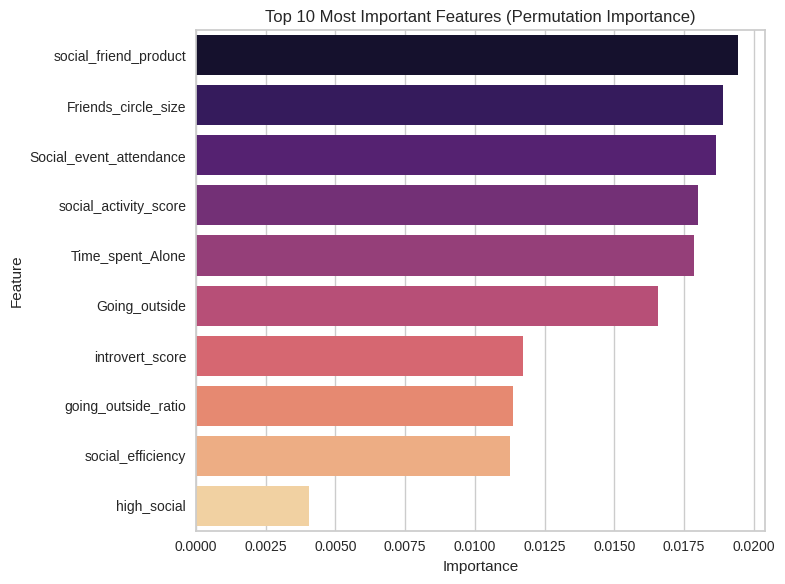

In [37]:
result = permutation_importance(
    wrapped_model, X_val, y_val, n_repeats=10, random_state=42, scoring='accuracy'
)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='magma')
plt.title('Top 10 Most Important Features (Permutation Importance)')
plt.tight_layout()
plt.show()


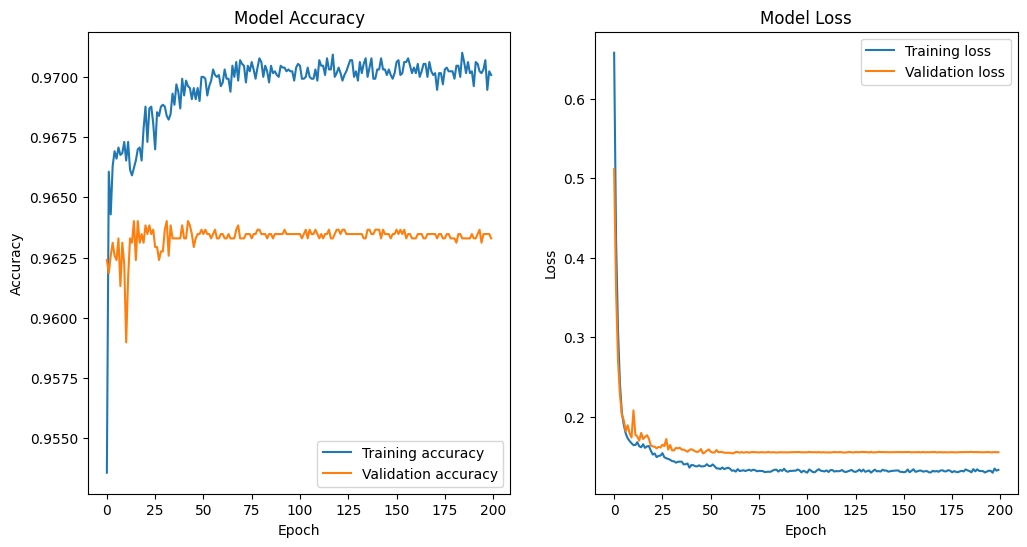

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grids = {
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Define model constructors
model_classes = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Run grid search for each model
best_models = {}

for name in model_classes:
    print(f"\n Grid search for {name}...")

    model = model_classes[name]
    params = param_grids[name]

    grid = GridSearchCV(model, params, cv=skf, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    print(f" Best params for {name}: {grid.best_params_}")
    print(f" Best cross-val accuracy: {grid.best_score_:.6f}")



 Grid search for Logistic Regression...
 Best params for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
 Best cross-val accuracy: 0.969304

 Grid search for Decision Tree...
 Best params for Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
 Best cross-val accuracy: 0.968070

 Grid search for K-Nearest Neighbors...
 Best params for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'uniform'}
 Best cross-val accuracy: 0.969381

 Grid search for Naive Bayes...
 Best params for Naive Bayes: {'var_smoothing': 1e-09}
 Best cross-val accuracy: 0.961592

 Grid search for Random Forest...
 Best params for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
 Best cross-val accuracy: 0.970075

 Grid search for Gradient Boosting...
 Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
 Best cross-val accuracy: 0.968919

 Grid search for SVM...
 Best params for SVM: {'C': 10, 'gamma': 'auto', 'kerne

**Create submission**

In [28]:
# model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=2, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

test_prediction = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test['id'],
    'Personality': test_prediction
})
submission['Personality'] = submission['Personality'].map({0: 'Introvert', 1: 'Extrovert'})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully!")


Validation Accuracy: 0.9636559913638
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1448
           1       0.97      0.98      0.98      4110

    accuracy                           0.96      5558
   macro avg       0.95      0.95      0.95      5558
weighted avg       0.96      0.96      0.96      5558

✅ Submission file created successfully!


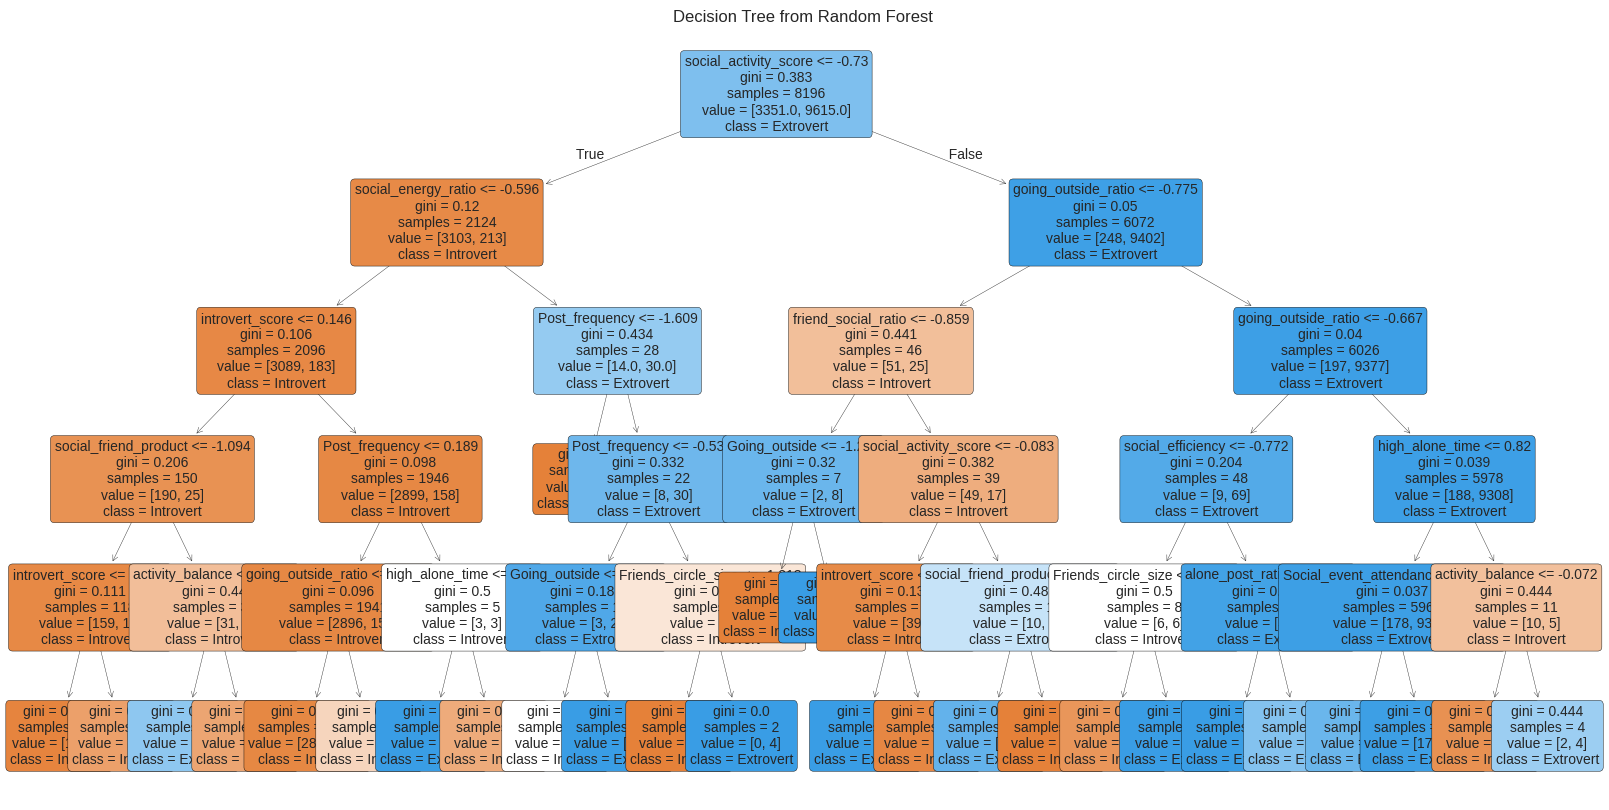

In [42]:
estimator = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=X_train.columns,
    class_names=['Introvert', 'Extrovert'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()


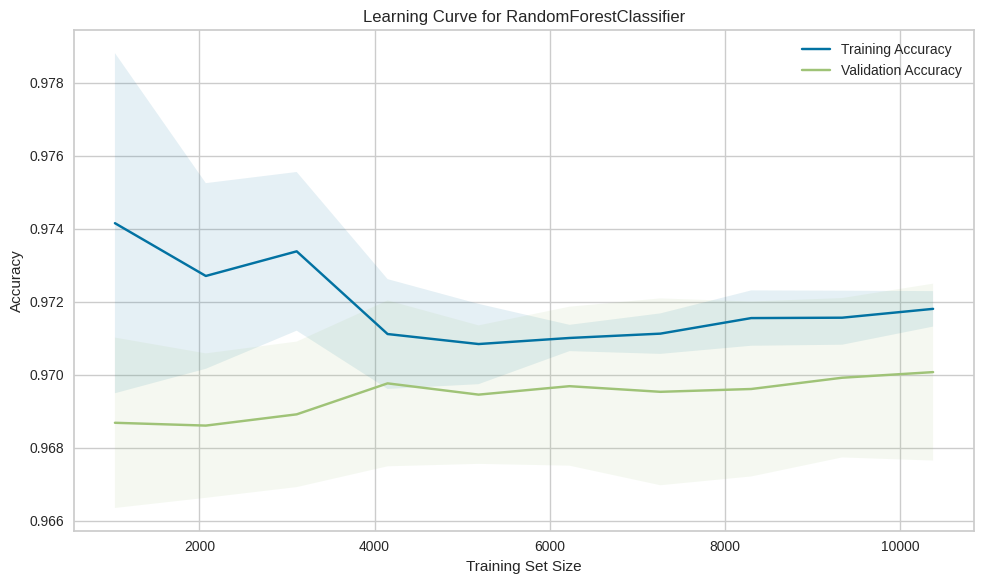

In [38]:
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title('Learning Curve for RandomForestClassifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
!pip install streamlit scikit-learn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [56]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("🧠 Personality Predictor")

# Input form
with st.form("personality_form"):
    Time_spent_Alone = st.slider("Time Spent Alone", 0, 10, 5)
    Social_event_attendance = st.slider("Social Event Attendance", 0, 10, 5)
    Going_outside = st.slider("Going Outside", 0, 10, 5)
    Friends_circle_size = st.slider("Friends Circle Size", 0, 10, 5)
    Post_frequency = st.slider("Post Frequency", 0, 10, 5)
    Stage_fear = st.selectbox("Stage Fear", ["Yes", "No"])
    Drained_after_socializing = st.selectbox("Drained After Socializing", ["Yes", "No"])

    submitted = st.form_submit_button("Predict Personality")

if submitted:
    df = pd.DataFrame([{
        "Time_spent_Alone": Time_spent_Alone,
        "Social_event_attendance": Social_event_attendance,
        "Going_outside": Going_outside,
        "Friends_circle_size": Friends_circle_size,
        "Post_frequency": Post_frequency,
        "Stage_fear": 1 if Stage_fear == "Yes" else 0,
        "Drained_after_socializing": 1 if Drained_after_socializing == "Yes" else 0
    }])

    # Apply same feature engineering as training
    df = feature_engineering(df)

    # Scale features
    df_scaled = scaler.transform(df.drop(columns=["id"], errors="ignore"))

    pred = model.predict(df_scaled)[0]
    label = "Extrovert" if pred == 1 else "Introvert"

    st.success(f"🎉 Predicted Personality: **{label}**")


2025-07-31 08:17:21.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.305 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.307 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.308 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.311 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 08:17:21.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [57]:
import joblib

# After training
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [63]:
code = '''import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and scaler
model = joblib.load("model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")
# Feature engineering function
def feature_engineering(df):
    df_new = df.copy()
    df_new['Stage_fear'] = df_new['Stage_fear'].map({'No': 0, 'Yes': 1}).fillna(-1)
    df_new['Drained_after_socializing'] = df_new['Drained_after_socializing'].map({'No': 0, 'Yes': 1}).fillna(-1)

    numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                      'Friends_circle_size', 'Post_frequency']

    for col in numerical_cols:
        df_new[col] = pd.to_numeric(df_new[col], errors='coerce').fillna(df_new[col].median())

    df_new['social_energy_ratio'] = df_new['Social_event_attendance'] / (df_new['Time_spent_Alone'] + 1)
    df_new['friend_social_ratio'] = df_new['Friends_circle_size'] / (df_new['Social_event_attendance'] + 1)
    df_new['post_social_ratio'] = df_new['Post_frequency'] / (df_new['Social_event_attendance'] + 1)
    df_new['social_activity_score'] = (df_new['Social_event_attendance'] + df_new['Going_outside'] +
                                       df_new['Friends_circle_size'] + df_new['Post_frequency']) / 4
    df_new['introvert_score'] = (df_new['Time_spent_Alone'] + df_new['Stage_fear'] +
                                 df_new['Drained_after_socializing']) / 3
    df_new['high_social'] = (df_new['Social_event_attendance'] > 5).astype(int)
    df_new['high_activity'] = (df_new['social_activity_score'] > 5).astype(int)
    df_new['low_friends'] = (df_new['Friends_circle_size'] < 5).astype(int)
    df_new['high_post'] = (df_new['Post_frequency'] > 5).astype(int)
    df_new['high_alone_time'] = (df_new['Time_spent_Alone'] > 5).astype(int)
    df_new['social_friend_product'] = df_new['Social_event_attendance'] * df_new['Friends_circle_size']
    df_new['alone_post_ratio'] = df_new['Time_spent_Alone'] / (df_new['Post_frequency'] + 1)
    df_new['going_outside_ratio'] = df_new['Going_outside'] / (df_new['Time_spent_Alone'] + 1)
    df_new['social_efficiency'] = df_new['Friends_circle_size'] / (df_new['Time_spent_Alone'] + 1)
    df_new['activity_balance'] = df_new['Social_event_attendance'] / (df_new['Post_frequency'] + 1)
    df_new['energy_management'] = np.where(df_new['Drained_after_socializing'] == -1, 0,
                                           df_new['Going_outside'] / (df_new['Drained_after_socializing'] + 1))
    df_new['stage_fear_encoded'] = df_new['Stage_fear'].map({-1: 0, 0: 1, 1: 2})
    df_new['drained_encoded'] = df_new['Drained_after_socializing'].map({-1: 0, 0: 1, 1: 2})

    df_new = df_new.replace([np.inf, -np.inf], np.nan)
    for col in df_new.columns:
        if col not in ['id', 'Personality']:
            if df_new[col].dtype in ['float64', 'float32']:
                df_new[col] = df_new[col].fillna(df_new[col].median())
            else:
                df_new[col] = df_new[col].fillna(0)

    return df_new

# Streamlit UI
st.title("🧠 Personality Predictor")

with st.form("personality_form"):
    Time_spent_Alone = st.slider("Time Spent Alone", 0, 10, 5)
    Social_event_attendance = st.slider("Social Event Attendance", 0, 10, 5)
    Going_outside = st.slider("Going Outside", 0, 10, 5)
    Friends_circle_size = st.slider("Friends Circle Size", 0, 10, 5)
    Post_frequency = st.slider("Post Frequency", 0, 10, 5)
    Stage_fear = st.selectbox("Stage Fear", ["Yes", "No"])
    Drained_after_socializing = st.selectbox("Drained After Socializing", ["Yes", "No"])

    submitted = st.form_submit_button("Predict Personality")

if submitted:
    input_df = pd.DataFrame([{
        "Time_spent_Alone": Time_spent_Alone,
        "Social_event_attendance": Social_event_attendance,
        "Going_outside": Going_outside,
        "Friends_circle_size": Friends_circle_size,
        "Post_frequency": Post_frequency,
        "Stage_fear": Stage_fear,
        "Drained_after_socializing": Drained_after_socializing
    }])

    processed_df = feature_engineering(input_df)

    # Scale
    X_input = processed_df.drop(columns=["id"], errors="ignore")
    X_input = X_input[feature_columns]  # enforce correct order & names
    X_scaled = scaler.transform(X_input)

    # Predict
    prediction = model.predict(X_scaled)[0]
    label = "Extrovert" if prediction == 1 else "Introvert"

    st.success(f"🎉 Predicted Personality: **{label}**")
'''

with open("app.py", "w") as f:
    f.write(code)


In [55]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
